# DATA SCIENCE CAPSTONE - PREDICTING COLLISION SEVERITY
# by Julian Ariza

## Table of contents
* [Introduction: Business Unerstanding](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Data Analysis](#analysis)
* [Data Preparation](#preparation)
* [Modeling and Evaluation](#results)

## Introduction: Business Understanding <a name="introduction"></a>

According to the World Health Organization, approximately 1.35 million people die each year as a result of road traffic crashes. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of ther injury. 

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured. Road traffic crashes cost most countries 3% of their gross domestic product.

https://www.who.int/news-room/fact-sheets/detail/road-traffic-injuries

The 2030 Agenda for Sustainable Development has set an ambitious target of halving the global number of deaths and injuries from road traffic crashes by 2020. Saying that, the use of data science and artificial intelligenge could have a huge impact in achieving this goal.

The addressing of this problem by data scientists teams has several benefits, starting by a continuous analysis of the important data to be collected on each crash, structuring the protocols of the different institutions handleling these situations, creating reaction teams not only for first aid but also to restablishing the normality of the traffic, using real time applications to alert commuters and more. This benefits not only tackle the problem from a goverment perspective but also from the commuter side.

The goal of this project is to create  machine learning model to predict the severity of an accident, property damage only or human injuries until death, given the data reported by the SDOT Traffic Management Division, Traffic Records Group of Detroit.

## Data <a name="data"></a>

The shared data is provided by the SDOT Traffic Management Division and Traffic Records Group. It is a .csv file that contains 194.673 collisions registered from 2004 to present in the city of Seattle.  

The target is the severity code that classifies the collisions as '1' or 'Property Damage Only Collision', and '2' or 'Injury Collision'.

In [1]:
import pandas as pd 
import numpy as np
print('Hello Capstone Project Course!')

Hello Capstone Project Course!


In [2]:
data = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')
data.describe(include = 'all')

C:\Users\Julian\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,1.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,1.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,1.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,1.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,2.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


## Methodology: <a name="methodology"></a>

First we analyze the values, data type and missing values for data cleaning and homogenization.

In [3]:
for column in data.columns.values.tolist():
    print(column)
    print(data[column].unique())
    print(len(data[column].unique()))
    print("")

SEVERITYCODE
[2 1]
2

X
[-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]
23564

Y
[47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]
23840

OBJECTID
[     1      2      3 ... 219545 219546 219547]
194673

INCKEY
[  1307  52200  26700 ... 311280 309514 308220]
194673

COLDETKEY
[  1307  52200  26700 ... 312640 310794 309500]
194673

REPORTNO
['3502005' '2607959' '1482393' ... '3809984' '3810083' 'E868008']
194670

STATUS
['Matched' 'Unmatched']
2

ADDRTYPE
['Intersection' 'Block' 'Alley' nan]
4

INTKEY
[37475.    nan 34387. ... 36056. 38057. 26005.]
7615

LOCATION
['5TH AVE NE AND NE 103RD ST' 'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N'
 '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST' ...
 '47TH AVE SW AND SW 98TH ST' 'NE PARK RD AND NE RAVENNA WB BV'
 'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1']
24103

EXCEPTRSNCODE
[' ' nan 'NEI']
3

EXCEPTRSNDESC
[nan 'Not Enough Information, or Insufficient Location Information']


In [4]:
nan = data.isnull()
for column in nan.columns.values.tolist():
    print(column)
    print(nan[column].value_counts())
    print("") 

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

We discard some columns because the information provided might not be available at the moment of the prediction.

In [5]:
out = ['OBJECTID', 'INCKEY', 'COLDETKEY', 'INTKEY', 'REPORTNO', 
       'STATUS', 'LOCATION', 'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'SEVERITYCODE.1', 
       'SEVERITYDESC', 'COLLISIONTYPE', 'PERSONCOUNT', 'VEHCOUNT', 'INCDATE',
       'SDOT_COLCODE', 'SDOTCOLNUM', 'ST_COLCODE', 'SEGLANEKEY', 'CROSSWALKKEY']

for column in data[out].columns.values.tolist():
    print(column)
    print(data[column].unique())
    print(len(data[column].unique()))
    print("")

OBJECTID
[     1      2      3 ... 219545 219546 219547]
194673

INCKEY
[  1307  52200  26700 ... 311280 309514 308220]
194673

COLDETKEY
[  1307  52200  26700 ... 312640 310794 309500]
194673

INTKEY
[37475.    nan 34387. ... 36056. 38057. 26005.]
7615

REPORTNO
['3502005' '2607959' '1482393' ... '3809984' '3810083' 'E868008']
194670

STATUS
['Matched' 'Unmatched']
2

LOCATION
['5TH AVE NE AND NE 103RD ST' 'AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N'
 '4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST' ...
 '47TH AVE SW AND SW 98TH ST' 'NE PARK RD AND NE RAVENNA WB BV'
 'PUGET BLVD SW BETWEEN SW HUDSON ST AND DEAD END 1']
24103

EXCEPTRSNCODE
[' ' nan 'NEI']
3

EXCEPTRSNDESC
[nan 'Not Enough Information, or Insufficient Location Information']
2

SEVERITYCODE.1
[2 1]
2

SEVERITYDESC
['Injury Collision' 'Property Damage Only Collision']
2

COLLISIONTYPE
['Angles' 'Sideswipe' 'Parked Car' 'Other' 'Cycles' 'Rear Ended' 'Head On'
 nan 'Left Turn' 'Pedestrian' 'Right Turn']
11

PERSONCOUNT
[ 2  4

In [6]:
df = data.drop(out, axis = 1)
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,PEDCOUNT,PEDCYLCOUNT,INCDTTM,JUNCTIONTYPE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLDESC,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,0,0,3/27/2013 2:54:00 PM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,Entering at angle,N
1,1,-122.347294,47.647172,Block,0,0,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,From same direction - both going straight - bo...,N
2,1,-122.334540,47.607871,Block,0,0,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,NaN,One parked--one moving,N
3,1,-122.334803,47.604803,Block,0,0,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,From same direction - all others,N
4,2,-122.306426,47.545739,Intersection,0,0,1/28/2004 8:04:00 AM,At Intersection (intersection related),"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,NaN,Entering at angle,N


We clean the data from al the NaN values. We also modify for homogenization and feature extraction.

In [7]:
df['SEVERITYCODE'].replace(1, 0, inplace = True)
df['SEVERITYCODE'].replace(2, 1, inplace = True)
df['X'].replace(np.nan, df['X'].mean(), inplace = True)
df['Y'].replace(np.nan, df['Y'].mean(), inplace = True)
df['ADDRTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['JUNCTIONTYPE'].replace(np.nan, 'Unknown', inplace = True)
df['INATTENTIONIND'].replace(np.nan, 0, inplace = True)
df['INATTENTIONIND'].replace('Y', 1, inplace = True)
df['UNDERINFL'].replace(np.nan, 0, inplace = True)
df['UNDERINFL'].replace(['N', '0'], 0, inplace = True)
df['UNDERINFL'].replace(['Y', '1'], 1, inplace = True)
df['WEATHER'].replace(np.nan, 'Unknown', inplace = True)
df['ROADCOND'].replace(np.nan, 'Unknown', inplace = True)
df['LIGHTCOND'].replace(np.nan, 'Unknown', inplace = True)
df['SPEEDING'].replace(np.nan, 0, inplace = True)
df['SPEEDING'].replace('Y', 1, inplace = True)
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['HOURDAY'] = df['INCDTTM'].dt.hour
df['DAYWEEK'] = df['INCDTTM'].dt.dayofweek
df['MONTH'] = df['INCDTTM'].dt.month
df['PEDROWNOTGRNT'].replace(np.nan, 0, inplace = True)
df['PEDROWNOTGRNT'].replace('Y', 1, inplace = True)
df['HITPARKEDCAR'].replace(['N', '0'], 0, inplace = True)
df['HITPARKEDCAR'].replace(['Y', '1'], 1, inplace = True)
df['ST_COLDESC'].replace(np.nan, 'Not Stated', inplace=True)

nan = df.isnull()
for column in nan.columns.values.tolist():
    print(column)
    print(nan[column].value_counts())
    print("")  

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    194673
Name: X, dtype: int64

Y
False    194673
Name: Y, dtype: int64

ADDRTYPE
False    194673
Name: ADDRTYPE, dtype: int64

PEDCOUNT
False    194673
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    194673
Name: PEDCYLCOUNT, dtype: int64

INCDTTM
False    194673
Name: INCDTTM, dtype: int64

JUNCTIONTYPE
False    194673
Name: JUNCTIONTYPE, dtype: int64

SDOT_COLDESC
False    194673
Name: SDOT_COLDESC, dtype: int64

INATTENTIONIND
False    194673
Name: INATTENTIONIND, dtype: int64

UNDERINFL
False    194673
Name: UNDERINFL, dtype: int64

WEATHER
False    194673
Name: WEATHER, dtype: int64

ROADCOND
False    194673
Name: ROADCOND, dtype: int64

LIGHTCOND
False    194673
Name: LIGHTCOND, dtype: int64

PEDROWNOTGRNT
False    194673
Name: PEDROWNOTGRNT, dtype: int64

SPEEDING
False    194673
Name: SPEEDING, dtype: int64

ST_COLDESC
False    194673
Name: ST_COLDESC, dtype: int64

HITPARKEDCAR
False    194673
Name: HI

In [8]:
df.drop(['INCDTTM'], axis = 1, inplace = True)

In [9]:
for column in df.columns.values.tolist():
    print(column)
    print(df[column].unique())
    print("")

SEVERITYCODE
[1 0]

X
[-122.3231484 -122.3472943 -122.33454   ... -122.3927543 -122.3042172
 -122.3616722]

Y
[47.70314032 47.64717249 47.60787143 ... 47.51527348 47.6695375
 47.55672231]

ADDRTYPE
['Intersection' 'Block' 'Alley' 'Unknown']

PEDCOUNT
[0 1 2 3 4 5 6]

PEDCYLCOUNT
[0 1 2]

JUNCTIONTYPE
['At Intersection (intersection related)'
 'Mid-Block (not related to intersection)' 'Driveway Junction'
 'Mid-Block (but intersection related)'
 'At Intersection (but not related to intersection)' 'Unknown'
 'Ramp Junction']

SDOT_COLDESC
['MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE'
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE'
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END'
 'PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE'
 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE'
 'MOTOR VEHICLE STRUCK OBJECT IN ROAD'
 'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT'
 'MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE'
 'DRIVERLESS VEHICLE STRUCK MOTOR 

## Data Analysis <a name="analysis"></a>

We perform a count of the frequency of collisions with injured for all values.

In [10]:
exclude = ['X', 'Y', 'SEVERITYDESC']

dacol = ['Column', 'Value', 'FreqDmg', 'FreqInj', 'PerInj', 'PerInjT', 'PerT']
da = {'Column':[],'Value':[],'FreqDmg':[],'FreqInj':[], 'PerInj':[], 'PerInjT':[], 'PerT':[]}
daf = pd.DataFrame(da,columns = dacol)

nt = len(data)
n2t = len(data[data['SEVERITYCODE'].isin([1])])

for column in df.columns.values.tolist():
    if column not in exclude:
        for unique in df[column].unique().tolist():
            n1 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([0])])
            n2 = len(df[df[column].isin([unique]) & df['SEVERITYCODE'].isin([1])])
            lvl2 = 100*(n2/(n1+n2))
            per2T = 100*n2/n2t
            perT = 100*n2/nt
            daf_len = len(daf)
            daf.loc[daf_len]=[column, unique, n1, n2, lvl2, per2T, perT]

In [11]:
daf.sort_values(by=['PerInjT', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('ST_COLDESC|SDOT_COLDESC')])

,Column,Value,FreqDmg,FreqInj,PerInj,PerInjT,PerT
23,SDOT_COLDESC,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",60871.0,24338.0,28.562711,17.831996,12.501991
25,SDOT_COLDESC,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",36551.0,17748.0,32.685685,13.003627,9.116827
99,ST_COLDESC,Entering at angle,21050.0,13624.0,39.291688,9.982049,6.998402
105,ST_COLDESC,From same direction - both going straight - on...,14403.0,11368.0,44.111598,8.329120,5.839536
33,SDOT_COLDESC,MOTOR VEHCILE STRUCK PEDESTRIAN,665.0,5853.0,89.797484,4.288383,3.006580
108,ST_COLDESC,From opposite direction - one left turn - one ...,5693.0,4631.0,44.856645,3.393047,2.378861
113,ST_COLDESC,Vehicle - Pedalcyclist,579.0,4122.0,87.683472,3.020112,2.117397
111,ST_COLDESC,Fixed object,10263.0,3291.0,24.280655,2.411254,1.690527
110,ST_COLDESC,From same direction - both going straight - bo...,4575.0,3054.0,40.031459,2.237609,1.568785
30,SDOT_COLDESC,"MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END A...",370.0,2734.0,88.079897,2.003151,1.404406


In [12]:
daf.sort_values(by=['PerInjT', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('ADDRTYPE')])

,Column,Value,FreqDmg,FreqInj,PerInj,PerInjT,PerT
3,ADDRTYPE,Block,96830.0,30096.0,23.711454,22.050775,15.459771
2,ADDRTYPE,Intersection,37251.0,27819.0,42.752420,20.382460,14.290117
5,ADDRTYPE,Unknown,1735.0,191.0,9.916926,0.139942,0.098113
4,ADDRTYPE,Alley,669.0,82.0,10.918775,0.060080,0.042122


In [1]:
#pbarh = daf[daf['Column'].str.contains('ADDRTYPE')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInj'].plot(kind = 'barh', color = 'orange')
#plt.title('Proportion of Collisions per Address Types')
#plt.ylabel('Address Type')
#plt.xlabel('Percentage')
#plt.show()

In [2]:
#pbarh = daf[daf['Column'].str.contains('ADDRTYPE')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInjT'].plot(kind = 'barh', color = 'purple')
#plt.title('Proportion of Collisions to Total Collisions with Injuries')
#plt.ylabel('Address Type')
#plt.xlabel('Percentage')
#plt.show()

In [121]:
daf.sort_values(by=['PerInjT', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('JUNCTIONTYPE')])

,Column,Value,FreqDmg,FreqInj,PerInj,PerInjT,PerT
16,JUNCTIONTYPE,At Intersection (intersection related),35636.0,27174.0,43.263811,19.909880,13.958792
17,JUNCTIONTYPE,Mid-Block (not related to intersection),70396.0,19404.0,21.608018,14.216947,9.967484
19,JUNCTIONTYPE,Mid-Block (but intersection related),15493.0,7297.0,32.018429,5.346375,3.748337
18,JUNCTIONTYPE,Driveway Junction,7437.0,3234.0,30.306438,2.369491,1.661247
20,JUNCTIONTYPE,At Intersection (but not related to intersection),1475.0,623.0,29.694948,0.456460,0.320024
21,JUNCTIONTYPE,Unknown,5936.0,402.0,6.342695,0.294538,0.206500
22,JUNCTIONTYPE,Ramp Junction,112.0,54.0,32.530120,0.039565,0.027739


In [4]:
#pbarh = daf[daf['Column'].str.contains('JUNCTIONTYPE')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInj'].plot(kind = 'barh', color = 'orange')
#plt.title('Proportion of Collisions per Junction Type')
#plt.ylabel('Junction Type')
#plt.xlabel('Percentage')
#plt.show()

In [3]:
#pbarh = daf[daf['Column'].str.contains('JUNCTIONTYPE')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInjT'].plot(kind = 'barh', color = 'purple')
#plt.title('Proportion of Collisions to Total Collisions with Injuries')
#plt.ylabel('Junction Type')
#plt.xlabel('Percentage')
#plt.show()

In [13]:
daf.sort_values(by=['PerInjT', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('WEATHER')])

,Column,Value,FreqDmg,FreqInj,PerInj,PerInjT,PerT
68,WEATHER,Clear,75295.0,35840.0,32.249066,26.259296,18.410360
67,WEATHER,Raining,21969.0,11176.0,33.718510,8.188446,5.740909
66,WEATHER,Overcast,18969.0,8745.0,31.554449,6.407298,4.492148
69,WEATHER,Unknown,18272.0,1900.0,9.418997,1.392094,0.975996
72,WEATHER,Fog/Smog/Smoke,382.0,187.0,32.864675,0.137011,0.096059
71,WEATHER,Snowing,736.0,171.0,18.853363,0.125288,0.087840
70,WEATHER,Other,716.0,116.0,13.942308,0.084991,0.059587
73,WEATHER,Sleet/Hail/Freezing Rain,85.0,28.0,24.778761,0.020515,0.014383
74,WEATHER,Blowing Sand/Dirt,41.0,15.0,26.785714,0.010990,0.007705
75,WEATHER,Severe Crosswind,18.0,7.0,28.000000,0.005129,0.003596


In [5]:
#pbarh = daf[daf['Column'].str.contains('WEATHER')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInj'].plot(kind = 'barh', color = 'orange')
#plt.title('Proportion of Collisions per Weather')
#plt.ylabel('Weather')
#plt.xlabel('Percentage')
#plt.show()

In [6]:
#pbarh = daf[daf['Column'].str.contains('WEATHER')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInjT'].plot(kind = 'barh', color = 'purple')
#plt.title('Proportion of Collisions to Total Collisions with Injuries')
#plt.ylabel('Weather')
#plt.xlabel('Percentage')
#plt.show()

In [14]:
daf.sort_values(by=['PerInjT', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('ROADCOND')])

,Column,Value,FreqDmg,FreqInj,PerInj,PerInjT,PerT
78,ROADCOND,Dry,84446.0,40064.0,32.177335,29.354141,20.580152
77,ROADCOND,Wet,31719.0,15755.0,33.186586,11.543393,8.093059
79,ROADCOND,Unknown,18281.0,1809.0,9.004480,1.325420,0.929251
81,ROADCOND,Ice,936.0,273.0,22.580645,0.200022,0.140235
80,ROADCOND,Snow/Slush,837.0,167.0,16.633466,0.122358,0.085785
82,ROADCOND,Other,89.0,43.0,32.575758,0.031505,0.022088
84,ROADCOND,Standing Water,85.0,30.0,26.086957,0.021980,0.015410
85,ROADCOND,Oil,40.0,24.0,37.500000,0.017584,0.012328
83,ROADCOND,Sand/Mud/Dirt,52.0,23.0,30.666667,0.016852,0.011815


In [7]:
#pbarh = daf[daf['Column'].str.contains('ROADCOND')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInj'].plot(kind = 'barh', color = 'orange')
#plt.title('Proportion of Collisions per Road Condition')
#plt.ylabel('Road Condition')
#plt.xlabel('Percentage')
#plt.show()

In [8]:
#pbarh = daf[daf['Column'].str.contains('ROADCOND')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInjT'].plot(kind = 'barh', color = 'purple')
#plt.title('Proportion of Collisions to Total Collisions with Injuries')
#plt.ylabel('Road Condition')
#plt.xlabel('Percentage')
#plt.show()

In [139]:
daf.sort_values(by=['PerInjT', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('LIGHTCOND')])

,Column,Value,FreqDmg,FreqInj,PerInj,PerInjT,PerT
86,LIGHTCOND,Daylight,77593.0,38544.0,33.188390,28.240466,19.799356
87,LIGHTCOND,Dark - Street Lights On,34032.0,14475.0,29.841054,10.605561,7.435546
90,LIGHTCOND,Dusk,3958.0,1944.0,32.937987,1.424332,0.998598
89,LIGHTCOND,Unknown,16948.0,1695.0,9.091884,1.241895,0.870691
91,LIGHTCOND,Dawn,1678.0,824.0,32.933653,0.603729,0.423274
88,LIGHTCOND,Dark - No Street Lights,1203.0,334.0,21.730644,0.244716,0.171570
92,LIGHTCOND,Dark - Street Lights Off,883.0,316.0,26.355296,0.231527,0.162323
93,LIGHTCOND,Other,183.0,52.0,22.127660,0.038099,0.026711
94,LIGHTCOND,Dark - Unknown Lighting,7.0,4.0,36.363636,0.002931,0.002055


In [9]:
#pbarh = daf[daf['Column'].str.contains('LIGHTCOND')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInj'].plot(kind = 'barh', color = 'orange')
#plt.title('Proportion of Collisions per Light Condition')
#plt.ylabel('Light Condition')
#plt.xlabel('Percentage')
#plt.show()

In [10]:
#pbarh = daf[daf['Column'].str.contains('LIGHTCOND')]
#pbarh.set_index('Value', inplace = True)
#pbarh['PerInjT'].plot(kind = 'barh', color = 'purple')
#plt.title('Proportion of Collisions to Total Collisions with Injuries')
#plt.ylabel('Light Condition')
#plt.xlabel('Percentage')
#plt.show()

In [16]:
daf.sort_values(by=['PerInjT', 'PerT'], ascending = False, inplace = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(daf[daf['Column'].str.contains('PEDCOUNT|PEDCYLCOUNT|PEDROWNOTGRNT')])

,Column,Value,FreqDmg,FreqInj,PerInj,PerInjT,PerT
95,PEDROWNOTGRNT,0,136025.0,53981.0,28.410155,39.550866,27.729064
13,PEDCYLCOUNT,0,135806.0,53383.0,28.216757,39.112723,27.421882
6,PEDCOUNT,0,135787.0,51947.0,27.670534,38.060593,26.684235
7,PEDCOUNT,1,678.0,6007.0,89.857891,4.401216,3.085687
14,PEDCYLCOUNT,1,679.0,4762.0,87.520676,3.489028,2.446153
96,PEDROWNOTGRNT,1,460.0,4207.0,90.143561,3.082390,2.161060
8,PEDCOUNT,2,19.0,207.0,91.592920,0.151665,0.106332
15,PEDCYLCOUNT,2,0.0,43.0,100.000000,0.031505,0.022088
9,PEDCOUNT,3,1.0,21.0,95.454545,0.015386,0.010787
10,PEDCOUNT,4,0.0,4.0,100.000000,0.002931,0.002055


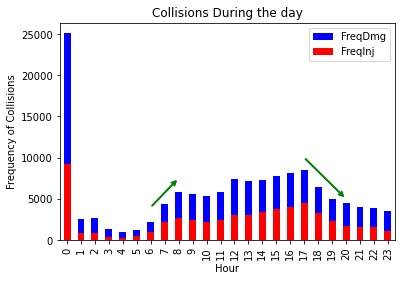

In [119]:
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
dfh = daf[daf['Column'].str.contains('HOURDAY')].sort_values('Value')
dfh.set_index('Value', inplace = True)
p = dfh['FreqDmg']
q = dfh['FreqInj']
plt.title('Collisions During the day')
p.plot(kind = 'bar', color = 'b', legend = True)
q.plot(kind = 'bar', color = 'r', legend = True)
plt.ylabel('Frequency of Collisions')
plt.xlabel('Hour')
plt.annotate('',
             xy = (20, 5000),
             xytext = (17, 10000),
             xycoords = 'data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2)
            )
plt.annotate('',
             xy = (8, 7500),
             xytext = (6, 4000),
             xycoords = 'data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='green', lw=2)
            )
plt.show()

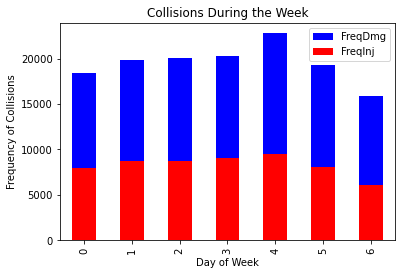

In [118]:
dfh = daf[daf['Column'].str.contains('DAYWEEK')].sort_values('Value')
dfh.set_index('Value', inplace = True)
plt.title('Collisions During the Week')
p = dfh['FreqDmg']
q = dfh['FreqInj']
p.plot(kind = 'bar', color = 'b', legend = True)
q.plot(kind = 'bar', color = 'r', legend = True)
plt.ylabel('Frequency of Collisions')
plt.xlabel('Day of Week')
plt.show()

In [13]:
#fs = 15
#figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
#dfh = daf[daf['Column'].str.contains('SDOT_COLDESC')].sort_values('Value')
#dfh.set_index('Value', inplace = True)
#plt.title('Classification from SDOT')
#plt.ylabel('Frequency of Collisions')
#p = dfh['FreqDmg']
#q = dfh['FreqInj']
#p.plot(kind = 'bar', color = 'b', legend = True)
#q.plot(kind = 'bar', color = 'r', legend = True)
#plt.show()

In [14]:
#figure(num=None, figsize=(fs, fs*0.5), dpi=80, facecolor='w', edgecolor='k')
#dfh = daf[daf['Column'].str.contains('ST_COLDESC')].sort_values('Value')
#dfh.set_index('Value', inplace = True)
#plt.title('Classification from ST')
#plt.ylabel('Frequency of Collisions')
#p = dfh['FreqDmg']
#q = dfh['FreqInj']
#p.plot(kind = 'bar', color = 'b', legend = True)
#q.plot(kind = 'bar', color = 'r', legend = True)
#plt.show()

In [52]:
import folium
seattle_map_dmg = folium.Map(location=[47.6062, -122.3321], zoom_start=12)
seattle_map_inj = folium.Map(location=[47.6062, -122.3321], zoom_start=12)

In [11]:
#incidents = folium.map.FeatureGroup()

#for i in range(len(df)):
#    clr = 'red'
#    if df.iloc[i, 0] == 0:
#        clr = 'blue'
#        incidents.add_child(
#            folium.features.CircleMarker(
#                [df.iloc[i, 2], df.iloc[i, 1]],
#                radius=0.1, 
#                color=clr,
#                fill=True,
#                fill_color=clr,
#                fill_opacity=0.6
#            )
#    )

#seattle_map_dmg.add_child(incidents)

In [12]:
#incidents = folium.map.FeatureGroup()

#for i in range(len(df)):
#    clr = 'blue'
#    if df.iloc[i, 0] == 1:
#        clr = 'red'
#        incidents.add_child(
#            folium.features.CircleMarker(
#                [df.iloc[i, 2], df.iloc[i, 1]],
#                radius=0.1, 
#                color=clr,
#                fill=True,
#                fill_color=clr,
#                fill_opacity=0.6
#            )
#    )

#seattle_map_inj.add_child(incidents)

In [55]:
df.drop(['SDOT_COLDESC', 'ST_COLDESC', 'HITPARKEDCAR'], axis = 1, inplace = True)
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'PEDCOUNT', 'PEDCYLCOUNT',
       'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND',
       'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'HOURDAY', 'DAYWEEK',
       'MONTH'],
      dtype='object')

## Data Preparation <a name="preparation"></a>

Due to the skewed data seen before, we add up some features and their values.

In [56]:
df['WEATHER'][df['WEATHER'].str.contains('Overcast|Fog')] = 'Low Visibility'
df['WEATHER'][df['WEATHER'].str.contains('Snowing|Hail')] = 'Low Temperatures'
df['WEATHER'][df['WEATHER'].str.contains('Blowing|Crosswind')] = 'Wind Related'
df['WEATHER'][~df['WEATHER'].str.contains('Clear|Raining|Low|Wind')] = 'Other'

<ipython-input-56-3f0a7e43664f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEATHER'][df['WEATHER'].str.contains('Overcast|Fog')] = 'Low Visibility'
<ipython-input-56-3f0a7e43664f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEATHER'][df['WEATHER'].str.contains('Snowing|Hail')] = 'Low Temperatures'
<ipython-input-56-3f0a7e43664f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WEATHER'][df['WEATHER'].str.contains

In [57]:
df['ROADCOND'][df['ROADCOND'].str.contains('Ice|Snow')] = 'Ice-Snow-Slush'
df['ROADCOND'][df['ROADCOND'].str.contains('Water|Wet')] = 'Wet-StandingWater'
df['ROADCOND'][df['ROADCOND'].str.contains('Oil|Sand|Other')] = 'Oil-Sand-Mud-Dirt-Other'

<ipython-input-57-e082fbf5ac93>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROADCOND'][df['ROADCOND'].str.contains('Ice|Snow')] = 'Ice-Snow-Slush'
<ipython-input-57-e082fbf5ac93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROADCOND'][df['ROADCOND'].str.contains('Water|Wet')] = 'Wet-StandingWater'
<ipython-input-57-e082fbf5ac93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ROADCOND'][df['ROADCOND'].str.contains

In [58]:
df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dark')] = 'Dark'
df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dusk|Dawn')] = 'Dusk-Dawn'
df['LIGHTCOND'].replace('Unknown','Other', inplace = True)

<ipython-input-58-2f5f859daa24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dark')] = 'Dark'
<ipython-input-58-2f5f859daa24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LIGHTCOND'][df['LIGHTCOND'].str.contains('Dusk|Dawn')] = 'Dusk-Dawn'


In [59]:
df['PEDNUM'] = df['PEDCOUNT']+df['PEDCYLCOUNT']
df.loc[df['PEDNUM'] > 0, 'PEDNUM'] = 1

In [60]:
df.drop(['PEDCOUNT', 'PEDCYLCOUNT'], axis = 1, inplace = True)
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND',
       'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT',
       'SPEEDING', 'HOURDAY', 'DAYWEEK', 'MONTH', 'PEDNUM'],
      dtype='object')

In [61]:
df['HOURDAY'] = df['HOURDAY']/df['HOURDAY'].max()
df['DAYWEEK'] = df['DAYWEEK']/df['DAYWEEK'].max()
df['MONTH'] = df['MONTH']/df['MONTH'].max()

In [62]:
X = df[['X', 'Y', 'ADDRTYPE', 'JUNCTIONTYPE', 'INATTENTIONIND', 'UNDERINFL', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'PEDROWNOTGRNT', 'SPEEDING', 'HOURDAY', 'DAYWEEK', 'MONTH', 'PEDNUM']]
y = df[['SEVERITYCODE']]

In [63]:
dummies = ['ADDRTYPE', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND']
X = pd.concat([X,pd.get_dummies(df[dummies])], axis = 1)
X.drop(dummies, axis = 1, inplace = True)
X.head()

,X,Y,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,HOURDAY,DAYWEEK,MONTH,PEDNUM,...,WEATHER_Wind Related,ROADCOND_Dry,ROADCOND_Ice-Snow-Slush,ROADCOND_Oil-Sand-Mud-Dirt-Other,ROADCOND_Unknown,ROADCOND_Wet-StandingWater,LIGHTCOND_Dark,LIGHTCOND_Daylight,LIGHTCOND_Dusk-Dawn,LIGHTCOND_Other
0,-122.323148,47.703140,0,0,0,0,0.608696,0.333333,0.250000,0,...,0,0,0,0,0,1,0,1,0,0
1,-122.347294,47.647172,0,0,0,0,0.782609,0.333333,1.000000,0,...,0,0,0,0,0,1,1,0,0,0
2,-122.334540,47.607871,0,0,0,0,0.434783,0.500000,0.916667,0,...,0,1,0,0,0,0,0,1,0,0
3,-122.334803,47.604803,0,0,0,0,0.391304,0.666667,0.250000,0,...,0,1,0,0,0,0,0,1,0,0
4,-122.306426,47.545739,0,0,0,0,0.347826,0.333333,0.083333,0,...,0,0,0,0,0,1,0,1,0,0


We perform feature extraction and this information is prepared for being fed to the machine learning algorithms.

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.4, random_state=5)

In [66]:
coordX_mean = X_train['X'].mean()
coordX_std = X_train['X'].std()
coordY_mean = X_train['Y'].mean()
coordY_std = X_train['Y'].std()

In [67]:
X_train['X'] = (X_train['X']-coordX_mean)/coordX_std
X_train['Y'] = (X_train['Y']-coordY_mean)/coordY_std
X_other['X'] = (X_other['X']-coordX_mean)/coordX_std
X_other['Y'] = (X_other['Y']-coordY_mean)/coordY_std

<ipython-input-67-faf2b6521c61>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['X'] = (X_train['X']-coordX_mean)/coordX_std
<ipython-input-67-faf2b6521c61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['Y'] = (X_train['Y']-coordY_mean)/coordY_std
<ipython-input-67-faf2b6521c61>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

In [68]:
X_cv, X_test, y_cv, y_test = train_test_split(X_other, y_other, test_size=0.5, random_state=5)

In [69]:
X_train = X_train.to_numpy()
y_train = y_train.to_numpy().ravel()
X_cv = X_cv.to_numpy()
y_cv = y_cv.to_numpy().ravel()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy().ravel()

## Modeling and Evaluation <a name="results"></a>

Cross validation data is used for tuning the parameters of the algorithms. Test data is used for final evaluation.

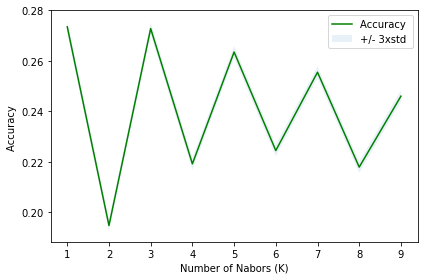

The best accuracy was with 0.2734996187779109 with k= 1


In [70]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhatKNN=neigh.predict(X_cv)
    mean_acc[n-1] = jaccard_score(y_cv, yhatKNN)    
    std_acc[n-1]=np.std(yhatKNN==y_cv)/np.sqrt(yhatKNN.shape[0])

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [71]:
from sklearn.metrics import classification_report
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhatKNN = neigh.predict(X_cv)
print("Jaccard Index: ", jaccard_score(y_cv, yhatKNN))
print(classification_report(y_cv, yhatKNN))

Jaccard Index:  0.2734996187779109
              precision    recall  f1-score   support

           0       0.75      0.76      0.76     27214
           1       0.43      0.43      0.43     11721

    accuracy                           0.66     38935
   macro avg       0.59      0.59      0.59     38935
weighted avg       0.66      0.66      0.66     38935



In [72]:
k = 1
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
yhatKNN = neigh.predict(X_test)
print("Jaccard Index: ", jaccard_score(y_test, yhatKNN))
print(classification_report(y_test, yhatKNN))

Jaccard Index:  0.2688961392060903
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     27224
           1       0.43      0.42      0.42     11711

    accuracy                           0.65     38935
   macro avg       0.59      0.59      0.59     38935
weighted avg       0.65      0.65      0.65     38935



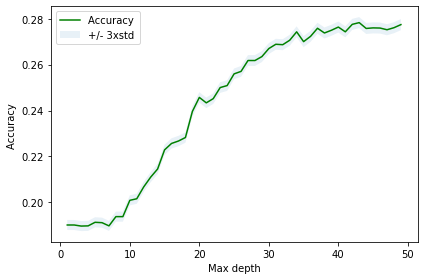

The best accuracy was with 0.27831820146995245 with depth = 43


In [76]:
from sklearn.tree import DecisionTreeClassifier

Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):    
    #Train Model and Predict 
    tree = DecisionTreeClassifier(criterion="entropy", max_depth = n) # max_depth = 14
    tree.fit(X_train,y_train)    
    predTree = tree.predict(X_cv)
    mean_acc[n-1] = jaccard_score(y_cv, predTree)    
    std_acc[n-1]=np.std(predTree==y_cv)/np.sqrt(predTree.shape[0])

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max depth')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with depth =", mean_acc.argmax()+1) 

In [77]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 43)
tree.fit(X_train,y_train)
predTree = tree.predict(X_cv)
print("Jaccard Index: ", jaccard_score(y_cv, predTree))
print(classification_report(y_cv, predTree))

Jaccard Index:  0.2779034690799397
              precision    recall  f1-score   support

           0       0.76      0.75      0.75     27214
           1       0.43      0.44      0.43     11721

    accuracy                           0.66     38935
   macro avg       0.59      0.59      0.59     38935
weighted avg       0.66      0.66      0.66     38935



In [78]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth = 43)
tree.fit(X_train,y_train)
predTree = tree.predict(X_test)
print("Jaccard Index: ", jaccard_score(y_test, predTree))
print(classification_report(y_test, predTree))

Jaccard Index:  0.2737775389575497
              precision    recall  f1-score   support

           0       0.75      0.75      0.75     27224
           1       0.42      0.44      0.43     11711

    accuracy                           0.65     38935
   macro avg       0.59      0.59      0.59     38935
weighted avg       0.66      0.65      0.65     38935



In [79]:
from sklearn import svm
C = [0.001,0.01,0.1,1]
mean_acc = np.zeros(len(C))
std_acc = np.zeros(len(C))
for idx, penalty in enumerate(C):
    preSVM = svm.SVC(kernel='poly', C = penalty, gamma = 'auto').fit(X_train,y_train)
    yhatSVM = preSVM.predict(X_cv)
    mean_acc[idx] = jaccard_score(y_cv, yhatSVM)
    std_acc[idx]=np.std(yhatSVM==y_cv)/np.sqrt(yhatSVM.shape[0])

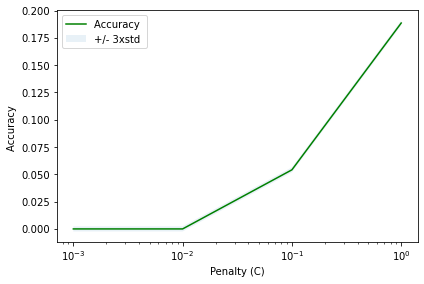

The best accuracy was with 0.18864148111083312 with C= 1


In [80]:
plt.plot(C,mean_acc,'g')
plt.fill_between(C,mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Penalty (C)')
plt.tight_layout()
plt.xscale('log')
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with C=", C[mean_acc.argmax()]) 

In [87]:
preSVM = svm.SVC(kernel='poly', C = 1, gamma = 'auto').fit(X_train,y_train)
yhatSVM = preSVM.predict(X_cv)
print("Jaccard Index: ", jaccard_score(y_cv, yhatSVM))
print(classification_report(y_cv, yhatSVM))

Jaccard Index:  0.18864148111083312
              precision    recall  f1-score   support

           0       0.74      0.99      0.85     27214
           1       0.89      0.19      0.32     11721

    accuracy                           0.75     38935
   macro avg       0.82      0.59      0.58     38935
weighted avg       0.79      0.75      0.69     38935



In [88]:
preSVM = svm.SVC(kernel='poly', C = 1, gamma = 'auto').fit(X_train,y_train)
yhatSVM = preSVM.predict(X_test)
print("Jaccard Index: ", jaccard_score(y_test, yhatSVM))
print(classification_report(y_test, yhatSVM))

Jaccard Index:  0.18114309553608676
              precision    recall  f1-score   support

           0       0.74      0.99      0.85     27224
           1       0.89      0.19      0.31     11711

    accuracy                           0.75     38935
   macro avg       0.81      0.59      0.58     38935
weighted avg       0.78      0.75      0.68     38935



In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
C = [0.0001, 0.0003, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1]
mean_acc = np.zeros(len(C))
std_acc = np.zeros(len(C))
for idx, penalty in enumerate(C):
    LR = LogisticRegression(C=penalty, solver='liblinear').fit(X_train,y_train)
    yhatLR = LR.predict(X_cv)
    mean_acc[idx] = jaccard_score(y_cv, yhatLR)
    std_acc[idx]=np.std(yhatLR==y_cv)/np.sqrt(yhatLR.shape[0])

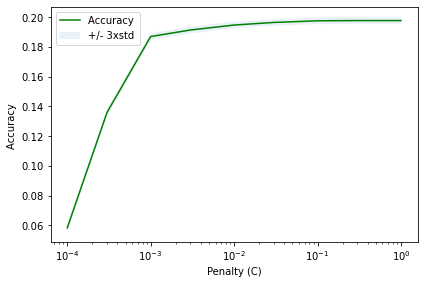

The best accuracy was with 0.19764279238440616 with C= 0.3


In [82]:
plt.plot(C,mean_acc,'g')
plt.fill_between(C,mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Penalty (C)')
plt.tight_layout()
plt.xscale('log')
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with C=", C[mean_acc.argmax()]) 

In [85]:
LR = LogisticRegression(C=0.3, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_cv)
yhat_prob = LR.predict_proba(X_cv)
print("Jaccard Index: ", jaccard_score(y_cv, yhatLR))
print("Log Loss: ", log_loss(y_cv, yhat_prob))
print(classification_report(y_cv, yhatLR))

Jaccard Index:  0.19764279238440616
Log Loss:  0.5255493119465516
              precision    recall  f1-score   support

           0       0.74      0.98      0.85     27214
           1       0.85      0.20      0.33     11721

    accuracy                           0.75     38935
   macro avg       0.80      0.59      0.59     38935
weighted avg       0.78      0.75      0.69     38935



In [86]:
LR = LogisticRegression(C=0.3, solver='liblinear').fit(X_train,y_train)
yhatLR = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)
print("Jaccard Index: ", jaccard_score(y_test, yhatLR))
print("Log Loss: ", log_loss(y_test, yhat_prob))
print(classification_report(y_test, yhatLR))

Jaccard Index:  0.19181795777540459
Log Loss:  0.5300760540630416
              precision    recall  f1-score   support

           0       0.74      0.98      0.84     27224
           1       0.83      0.20      0.32     11711

    accuracy                           0.75     38935
   macro avg       0.79      0.59      0.58     38935
weighted avg       0.77      0.75      0.69     38935

